In [1]:
#Installing Clustering and UMAP
!pip install hdbscan
!pip install umap-learn
!pip install umap-learn[plot]

     |████████████████████████████████| 5.2 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330776 sha256=5b7b00b31dbab16636108a1b68598a9d64b2b90a88e5d1923ef3b9ab7eb66316
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan
     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 30.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b710af1077c1b4dee4652f1e6b7dd6c2b9d0d5c940adda84bfc81ece5ad01468
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=f9615663519372bfd81d5a2c97f733a6c528a25236a

In [2]:
#Importing the required Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import umap.umap_ as umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [3]:
#Reading the dataset
cover_type = pd.read_csv("sample_data/covertype.csv")

In [4]:
#Reading few data from the dataset
cover_type.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
4,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5


In [5]:
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
kmeans_labels = cluster.KMeans(n_clusters=7).fit_predict(cover_type)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


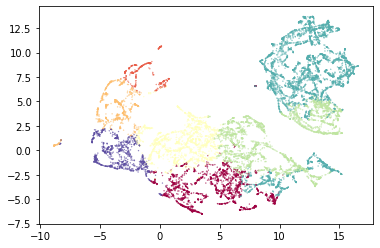

In [6]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(cover_type)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');

In [7]:
# Dividing dataset into label and feature sets
X = cover_type.drop(['Cover_Type'], axis = 1) # Features
Y = cover_type['Cover_Type'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(14000, 54)
(14000,)


In [8]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [9]:
# Implementing PCA to visualize dataset
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.figure_factory as ff
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))
forest_patches=list(cover_type['Cover_Type'])

Variance explained by each of the n_components:  [0.08568169 0.05934164]
Total variance explained by the n_components:  0.145023330443222


In [10]:
df = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=Y, colorscale='Rainbow', opacity=0.5),
                                text=[f'forest_patches: {a}' for a in forest_patches],
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=df, layout=layout)
fig.show()

In [11]:
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_components = 2, n_neighbors=7, min_dist=0.1)
x_umap = u.fit_transform(X_scaled)

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=Y, colorscale='Rainbow', opacity=0.5),
                                text=[f'forest_patches: {a}' for a in forest_patches],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



**Q1. Can you identify any clusters of forest patches? If yes, then describe these cluster**


**Answer:** From the above ouput, we can state that there is no forest patch clusters and mostly the forest patches seems to be overlapping each other.

**Q2. For each of the seven trees mentioned in the data, can you identify the characteristics of
forest patches where a particular tree type might be present predominantly?**


**Answer:** Yes, after observing the above scatter plot, the predominant presence of forest can be clearly viewed and below are the forest types sharing same characteristics.

a. 1, 2, 5, and 7 shares the same characteristics forming wilderness area 1. 

b. Forest patches 1, 2, 7 forming wilderness area 2.

c. Forest patches 1, 2, 3, 5, 7 forming wilderness area 3.

d. Forest patch 2, 3, 4, 6 forming forming wilderness area 3.


**Q3.	Are there any tree types which can grow in more diverse environments?**


**Answer:** From the above output, we can state that Wilderness_Area1, Wilderness_Area1 and Hillshade_Noon can growm in more diverse environments as compared to others.
